In [6]:
from ipywidgets import *
import numpy as np
from scipy.stats import special_ortho_group
from aperiodic_codes.cut_and_project.cnp_utils import *
import matplotlib.pyplot as plt
from six_to_three import *
from config import prefix

%matplotlib widget

In [7]:
f_base = f'{prefix}/6d_to_3d/int';
n = 3;
nTh = 16;
lat_pts = gen_lat(low=-n, high=n, dim=6);
bdry = np.any(abs(lat_pts) == n,axis=1);
assert lat_pts.shape[0] == (2*n+1)**6, f'Number of lattice points should be {n**6}';
voronoi = gen_voronoi(dim=6);

In [8]:
h1 = gen_h1(n);
h2 = gen_h2(n);
hx, hz = gen_hgp(h1, h2);
hx_vv, hx_cc = get_hx_vv_cc(hx, n);
hz_vv, hz_cc = get_hz_vv_cc(hz, n);
hx = hx.tocsr();
hz = hz.tocsr();

In [9]:
offset = np.array([0,0,0,0,0,0]);
P = proj_mat();
proj_pos = P[:,:3];
proj_neg = P[:,3:];

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.141592653589793, min=-3.141592653589793, …

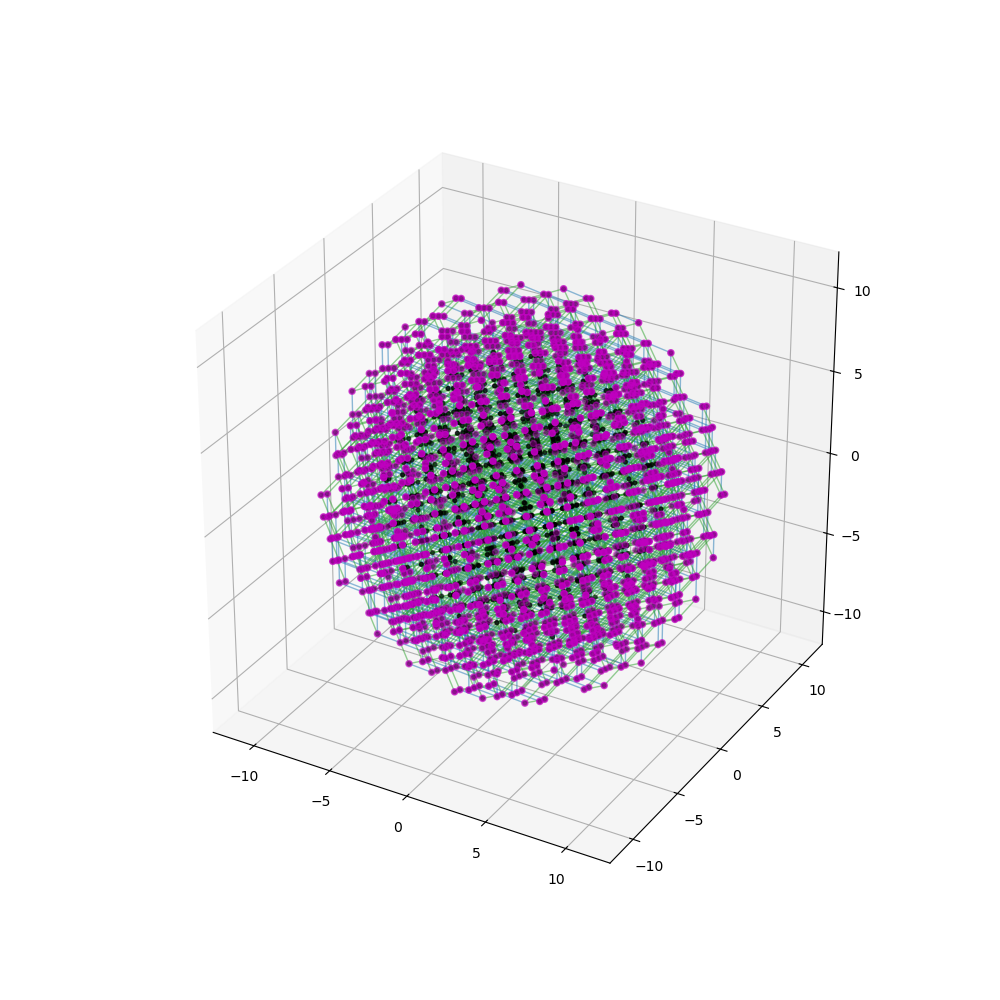

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d');
ax.set_aspect('equal', 'box')

def update(t0=0.0 , t1=0.0 , t2=0.0 , t3=0.0 , t4=0.0 , t5=0.0 , t6=0.0 , t7=0.0 , t8=0.0 , t9=0.0, t10=0.0, t11=0.0, t12=0.0, t13=0.0, t14=0.0):
    ax.clear();
    R = gen_rotation((t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14),6);
    proj_pos_R = R @ proj_pos;
    proj_neg_R = R @ proj_neg;
    cut_ind, full_to_cut_ind_map = cut_ext(lat_pts, voronoi, proj_neg, offset, f_base, nTh);
    cut_pts = lat_pts[cut_ind,:];
    proj_pts = project(cut_pts, proj_pos_R);
    new_hx_vv = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hx_vv, n);
    new_hx_cc = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hx_cc, n);
    new_hz_vv = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hz_vv, n);
    new_hz_cc = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hz_cc, n);

    cut_bdry = [i for i in range(len(cut_ind)) if bdry[cut_ind[i]]];

    for x in np.argwhere(new_hx_cc != 0):
        ax.plot([proj_pts[x[0],0],proj_pts[x[1],0]],[proj_pts[x[0],1],proj_pts[x[1],1]],[proj_pts[x[0],2],proj_pts[x[1],2]],color='C0',lw=1,alpha=0.5);
    for x in np.argwhere(new_hz_cc != 0):
        ax.plot([proj_pts[x[0],0],proj_pts[x[1],0]],[proj_pts[x[0],1],proj_pts[x[1],1]],[proj_pts[x[0],2],proj_pts[x[1],2]],color='C2',lw=1,alpha=0.5);
    new_hx = np.hstack([new_hx_cc, new_hx_vv]);
    new_hz = np.hstack([new_hz_cc, new_hz_vv]);
    anti_comm_mat = (new_hx @ new_hz.T) % 2;
    #for x in np.argwhere(anti_comm_mat != 0):
        #ax.plot([proj_pts[x[0],0],proj_pts[x[1],0]],[proj_pts[x[0],1],proj_pts[x[1],1]],ls='-',lw=2,color='r');
    ax.scatter(proj_pts[:,0], proj_pts[:,1], proj_pts[:,2],color='k',s=8);
    ax.scatter(proj_pts[cut_bdry,0], proj_pts[cut_bdry,1], proj_pts[cut_bdry,2],color='m',s=20);
    #ax.text(0.01, 0.97, f'{cut_pts.shape[0]},{np.sum(anti_comm_mat)}',transform=ax.transAxes);

interact(update,t0=(-pi,pi,pi/30),t1=(-pi,pi,pi/30),t2=(-pi,pi,pi/30),t3=(-pi,pi,pi/30),t4=(-pi,pi,pi/30),t5=(-pi,pi,pi/30),t6=(-pi,pi,pi/30),t7=(-pi,pi,pi/30),t8=(-pi,pi,pi/30),t9=(-pi,pi,pi/30),t10=(-pi,pi,pi/30),t11=(-pi,pi,pi/30),t12=(-pi,pi,pi/30),t13=(-pi,pi,pi/30),t14=(-pi,pi,pi/30));